# ****Supernova MH-MCMC exercise****

### $\circ$ Metropolis Hastings Markov Chain Monte Carlo (MH-MCMC) Code


In [4]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as ii
import warnings
warnings.filterwarnings('ignore')

Starting Point (Step 1)

In [5]:
#Defining a 
def main(a,z1,omm,h):
    def eta(a,omm):
        s = ((1-omm)/omm)**1/3
        return 2*(np.sqrt(s**3 + 1))*(1/a**4 - 0.1540*(s/a**3) + 0.4304*(s**2/a**2)+0.19097*(s**3/a)+0.066941*s**4)**(-1/8)
    
    def DL(z1,omm,h):   #Luminosity Distance(DL)
        return (3000)*(1+z1)*(eta(1,omm)-eta(1/(1+z1),omm))
    
    def mu(z1,omm,h):    #Distance modulus(mu)
        return 25 - 5*np.log(h) + 5*np.log10(DL(z1,omm,h))
    
    mu_values = [mu(z_val,omm,h) for z_val in z1]
    
    return z1, mu_values

Plotting original data (Step 2)

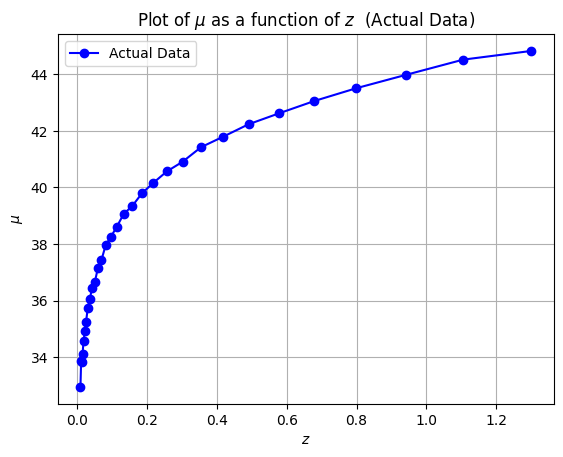

In [6]:
SNdata = np.genfromtxt("jla_mub_0.txt")   #actual_data(containing z and M)
z = SNdata[:,0]
M = SNdata[:,1]

plt.plot(z,M,marker='o',color='b',label='Actual Data')
plt.xlabel(r"$z$")
plt.ylabel(r'$\mu$')
plt.title(r"Plot of $\mu$ as a function of $z$  (Actual Data)")
plt.grid()
plt.legend()


In [7]:
#to make it out of the defined function

def eta(a,omm):
    s = ((1-omm)/omm)**1/3
    return 2*(np.sqrt(s**3 + 1))*(1/a**4 - 0.1540*(s/a**3) + 0.4304*(s**2/a**2)+0.19097*(s**3/a)+0.066941*s**4)**(-1/8)


def DL(z,omm,h):   #Luminosity Distance(DL)
    return (3000)*(1+z)*(eta(1,omm)-eta(1/(1+z),omm))

def mu(z,omm,h):    #Distance modulus(mu)
    return 25 - 5*np.log(h) + 5*np.log10(DL(z,omm,h))

Comparing the actual data with the defined function for different value of parameters (Step 3)

Comparing Actual Data with the Data defined by different parameter values of defined function


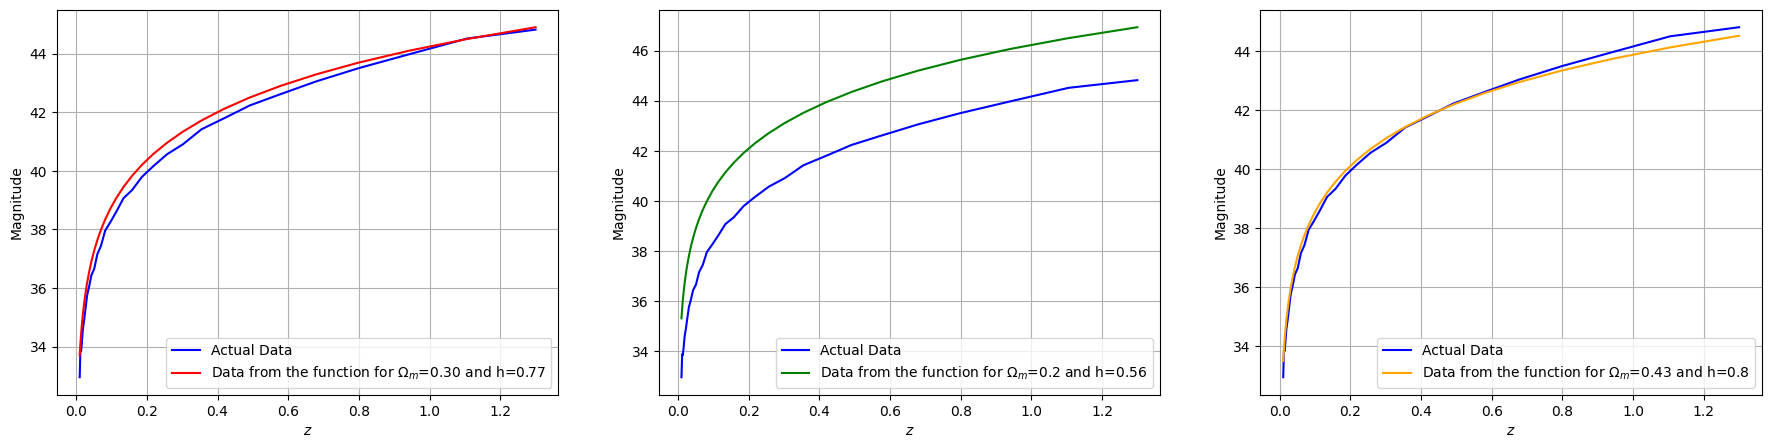

In [8]:
plt.rcParams["figure.figsize"]=(6,5) #global figsize
print('Comparing Actual Data with the Data defined by different parameter values of defined function')

fig, axs = plt.subplots(1, 3, figsize=(22, 5))

z2, mu_values = main(1, z, 0.30, 0.77)   # Plotting for omm=0.30 and h=0.77
axs[0].plot(z, M, label='Actual Data', color='b')
axs[0].plot(z2, mu_values, color='r', label=f'Data from the function for $\Omega_m$=0.30 and h=0.77')
axs[0].set_xlabel(r'$z$')
axs[0].set_ylabel('Magnitude')
axs[0].legend()
axs[0].grid()

z3, mu_values1 = main(1, z, 0.2, 0.56)   # Plotting for omm=0.2 and h=0.56
axs[1].plot(z, M, label='Actual Data', color='b')
axs[1].plot(z3, mu_values1, color='g', label=f'Data from the function for $\Omega_m$=0.2 and h=0.56')
axs[1].set_xlabel(r'$z$')
axs[1].set_ylabel('Magnitude')
axs[1].legend()
axs[1].grid()

z4, mu_values2 = main(1, z, 0.43, 0.8)  # Plotting for omm=0.43 and h=0.8
axs[2].plot(z, M, label='Actual Data', color='b')
axs[2].plot(z4, mu_values2, color='orange', label=f'Data from the function for $\Omega_m$=0.43 and h=0.8')
axs[2].set_xlabel(r'$z$')
axs[2].set_ylabel('Magnitude')
axs[2].legend()
axs[2].grid()

plt.show()


# Please load files before running

Main Part

Estimated Matter Density :  0.20080079456726194
Estimated h Value :  0.8579811886721861
Acceptance Ratio :  36.83


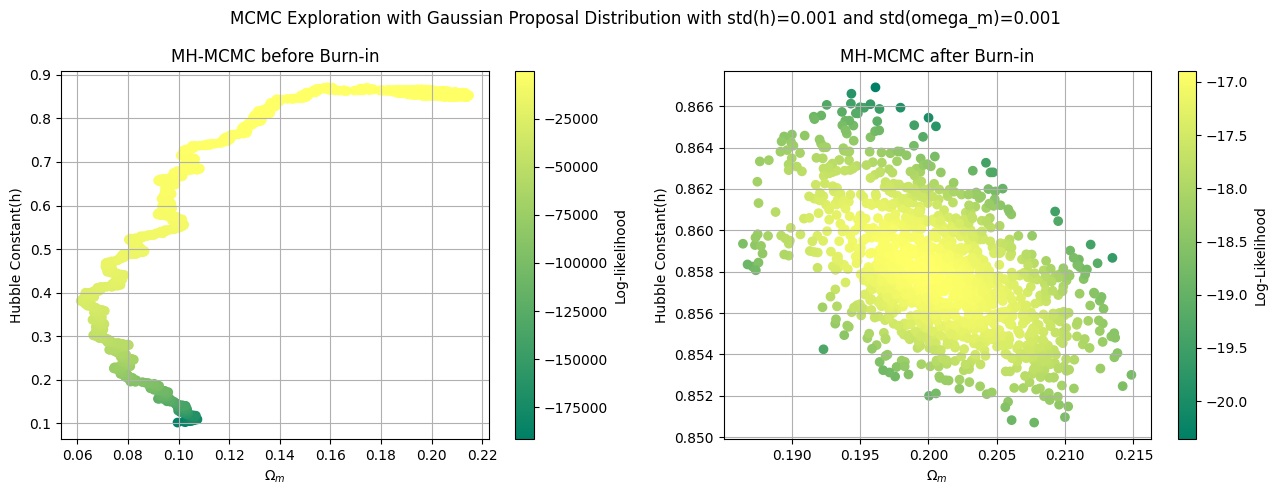

In [9]:
matrix = np.genfromtxt('jla_mub_covmatrix.txt')
m = 31   #size of the square covariant matrix
Cov = np.reshape(matrix, (m,m))  #reshaping covariance matrix
Cov_inv = ii.inv(Cov)  #calculating inverse of covariance matrix

dif = diff = np.empty(m)  

def likelihood(M,z,omm,h):   
    if omm<=0 or h <=0:
        ll = -1e100               #ll for log-likelihood
    elif omm>=1 or h >=1:
        ll = -1e100
    else:
        dif[:] = M-mu(z,omm,h)
        dt = np.dot(Cov_inv,dif)
        ll = -0.5*np.dot(dif,dt)
    return ll

sigma_o = 0.001
sigma_h = 0.001

def mh_mcmc(om0,h0):
    om1 = np.abs(om0 + sigma_o*np.random.randn())
    h1 = np.abs(h0 + sigma_h*np.random.randn())

    old_l = likelihood(M,z,om0,h0)
    new_l = likelihood(M,z,om1,h1)

    alpha_l = new_l - old_l
    if np.log(np.random.normal(0.5,1)) < alpha_l:
        return om1,h1,True
    else:
        return om0,h0,False

om_ini = [0.1]   #initial guess or starting point
h_ini = [0.1]    

nap = 0 #Number of Accepted Proposal
log_likelihood = []  #intended to store log liklihood values abtained during each MCMC sampling process

N=10000 #given

for i in range(1,N):
    om_prev = om_ini[-1]     #omega_previous
    h_prev = h_ini[-1]

    om_a, h_a,accepted= mh_mcmc(om_prev,h_prev)      #om_a = omega_accepted
    if accepted:
        om_ini.append(om_a)
        h_ini.append(h_a)
        nap += 1
        log_likelihood.append(likelihood(M,z,om_a,h_a))

accep_ratio = (nap*100)/N

#Burn-in  
def burnin(original_value):
    x1, y1 = 0, 50
    x2, y2 = 60, 15
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    scaled_value = m * original_value + b
    return scaled_value/100

#calculating standard deviation foro burn in
n = np.size(om_ini)
std_burnin = np.std(om_ini[n-int(burnin(accep_ratio)*n):])

#burn-in process
burn=0
while np.std(om_ini[burn:]) >= std_burnin:
    burn +=1

#discarding burn-in from :
omega = om_ini[burn:]
hubble_cons = h_ini[burn:]
log_likelihoods = log_likelihood[burn:]

#After burn-in
om_f = np.mean(omega)    #mean of omega after burn in
h_f = np.mean(hubble_cons)    #mean of h after burn in
om_std = np.std(om_ini)       #standard deviation of omega before burn in

#printing results
print('Estimated Matter Density : ',om_f)
print('Estimated h Value : ',h_f)
print('Acceptance Ratio : ', accep_ratio)

#Theoretical distance modulus
xth = np.empty(m)
for i in range(m):
    xth[i] = mu(z[i], om_f, h_f)

#Plotting
plt.figure(figsize=[13, 5])
plt.suptitle(f'MCMC Exploration with Gaussian Proposal Distribution with std(h)={sigma_h} and std(omega_m)={sigma_o}')

#Scatter plot for MH-MCMC before burn-in
plt.subplot(121)
colormap = 'summer'
plt.scatter(om_ini[1:],h_ini[1:],c=log_likelihood,cmap=colormap)
cbar=plt.colorbar()
cbar.set_label('Log-likelihood')
plt.title('MH-MCMC before Burn-in')
plt.xlabel(f'$\Omega_m$')
plt.ylabel('Hubble Constant(h)')
plt.grid()

#Scatter plot for MH-MCMC after burn-in 
plt.subplot(122)
colormap = 'summer'
plt.scatter(omega[1:],hubble_cons[1:],c=log_likelihoods,cmap=colormap)
cbar=plt.colorbar()
cbar.set_label('Log-Likelihood')
plt.title('MH-MCMC after Burn-in')
plt.xlabel(f'$\Omega_m$')
plt.ylabel('Hubble Constant(h)')
plt.grid()

plt.tight_layout()
plt.show()

Text(0.5, 0, 'h')

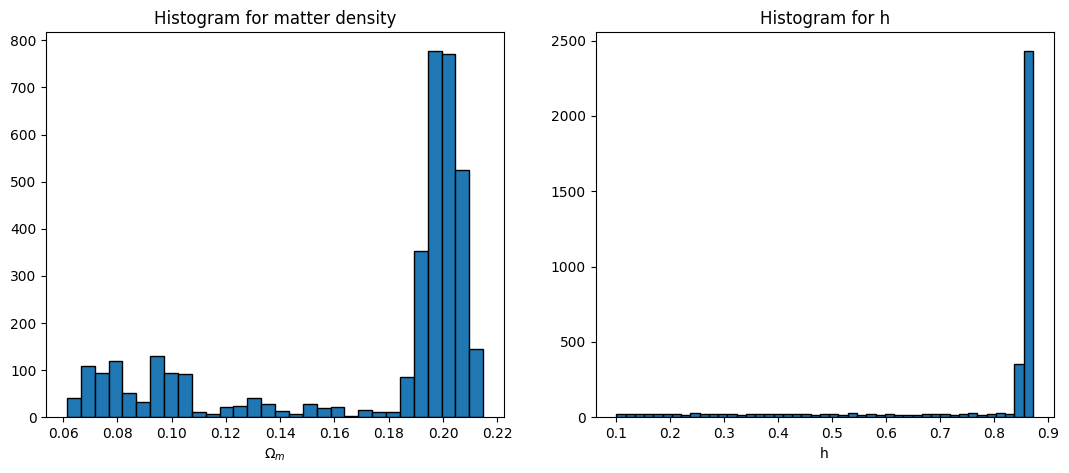

In [10]:
#Histrogram
plt.figure(figsize=[13, 5])
plt.subplot(121)
plt.hist(om_ini[1:],bins=30,edgecolor='black')
plt.title('Histogram for matter density')
plt.xlabel(f'$\Omega_m$')

plt.subplot(122)
plt.hist(h_ini[1:],bins=45,edgecolor='black')
plt.title('Histogram for h')
plt.xlabel('h')


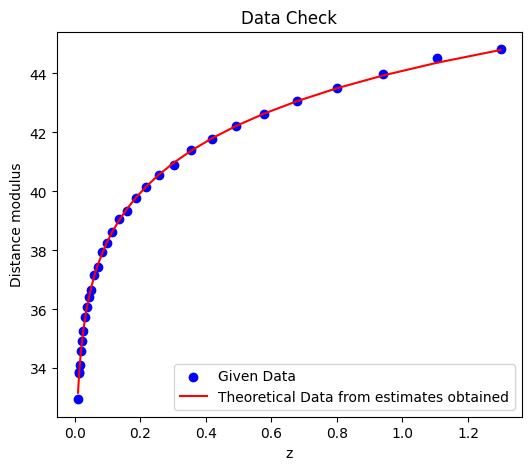

In [11]:
plt.xlabel('z')
plt.ylabel('Distance modulus')
plt.title('Data Check')
plt.scatter(z, M, c='b', label="Given Data")
plt.plot(z, xth, c='r', label="Theoretical Data from estimates obtained")
plt.legend()
plt.show()

*Different Proposal Distributions*

Estimated Matter Density :  0.10814033540552967
Estimated h Value :  0.28756254547245685
Acceptance Ratio :  34.53


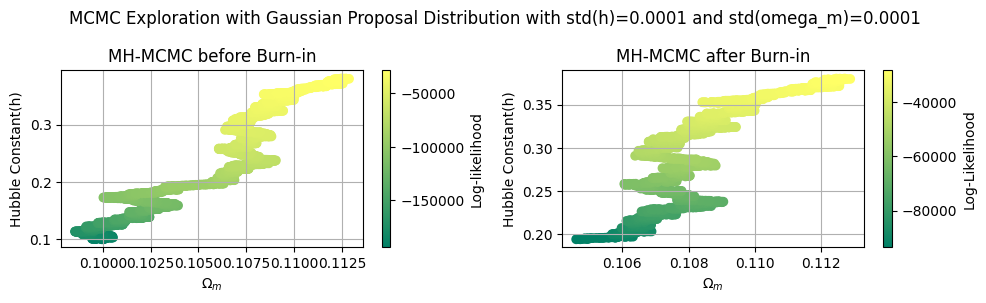

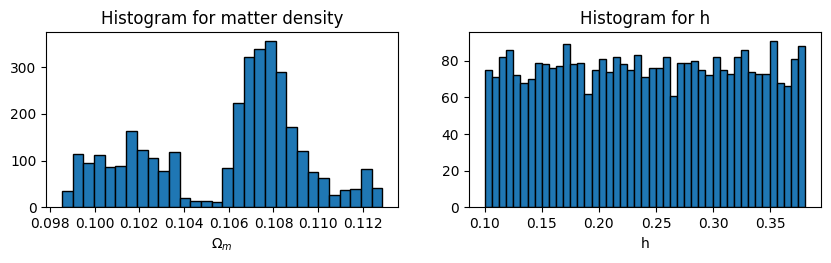

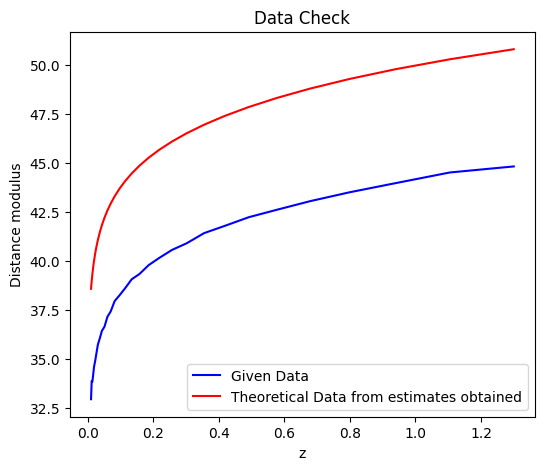

In [12]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as ii
import warnings
warnings.filterwarnings('ignore')

SNdata = np.genfromtxt("jla_mub_0.txt")   #actual_data(containing z and M)
z = SNdata[:,0]
M = SNdata[:,1]

def eta(a,omm):
    s = ((1-omm)/omm)**1/3
    return 2*(np.sqrt(s**3 + 1))*(1/a**4 - 0.1540*(s/a**3) + 0.4304*(s**2/a**2)+0.19097*(s**3/a)+0.066941*s**4)**(-1/8)


def DL(z,omm,h):   #Luminosity Distance(DL)
    return (3000)*(1+z)*(eta(1,omm)-eta(1/(1+z),omm))

def mu(z,omm,h):    #Distance modulus(mu)
    return 25 - 5*np.log(h) + 5*np.log10(DL(z,omm,h))

matrix = np.genfromtxt('jla_mub_covmatrix.txt')
m = 31   #size of the square covariant matrix
Cov = np.reshape(matrix, (m,m))  #reshaping covariance matrix
Cov_inv = ii.inv(Cov)  #calculating inverse of covariance matrix

dif = diff = np.empty(m)  

def likelihood(M,z,omm,h):   
    if omm<=0 or h <=0:
        ll = -1e100               #ll for log-likelihood
    elif omm>=1 or h >=1:
        ll = -1e100
    else:
        dif[:] = M-mu(z,omm,h)
        dt = np.dot(Cov_inv,dif)
        ll = -0.5*np.dot(dif,dt)
    return ll

sigma_o = 0.0001
sigma_h = 0.0001

def mh_mcmc(om0,h0):
    om1 = np.abs(om0 + sigma_o*np.random.randn())
    h1 = np.abs(h0 + sigma_h*np.random.randn())

    old_l = likelihood(M,z,om0,h0)
    new_l = likelihood(M,z,om1,h1)

    alpha_l = new_l - old_l
    if np.log(np.random.normal(0.5,1)) < alpha_l:
        return om1,h1,True
    else:
        return om0,h0,False

om_ini = [0.1]   #initial guess or starting point
h_ini = [0.1]    

nap = 0 #Number of Accepted Proposal
log_likelihood = []  #intended to store log liklihood values abtained during each MCMC sampling process

N=10000 #given

for i in range(1,N):
    om_prev = om_ini[-1]     #omega_previous
    h_prev = h_ini[-1]

    om_a, h_a,accepted= mh_mcmc(om_prev,h_prev)      #om_a = omega_accepted
    if accepted:
        om_ini.append(om_a)
        h_ini.append(h_a)
        nap += 1
        log_likelihood.append(likelihood(M,z,om_a,h_a))

accep_ratio = (nap*100)/N

#Burn-in  
def burnin(original_value):
    x1, y1 = 0, 50
    x2, y2 = 60, 15
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    scaled_value = m * original_value + b
    return scaled_value/100

#calculating standard deviation foro burn in
n = np.size(om_ini)
std_burnin = np.std(om_ini[n-int(burnin(accep_ratio)*n):])

#burn-in process
burn=0
while np.std(om_ini[burn:]) >= std_burnin:
    burn +=1

#discarding burn-in from :
omega = om_ini[burn:]
hubble_cons = h_ini[burn:]
log_likelihoods = log_likelihood[burn:]

#After burn-in
om_f = np.mean(omega)    #mean of omega after burn in
h_f = np.mean(hubble_cons)    #mean of h after burn in
om_std = np.std(om_ini)       #standard deviation of omega before burn in

#printing results
print('Estimated Matter Density : ',om_f)
print('Estimated h Value : ',h_f)
print('Acceptance Ratio : ', accep_ratio)

#Theoretical distance modulus
xth = np.empty(m)
for i in range(m):
    xth[i] = mu(z[i], om_f, h_f)

#Plotting
plt.figure(figsize=[10, 5])
plt.suptitle(f'MCMC Exploration with Gaussian Proposal Distribution with std(h)={sigma_h} and std(omega_m)={sigma_o}')

#Scatter plot for MH-MCMC before burn-in
plt.subplot(221)
colormap = 'summer'
plt.scatter(om_ini[1:],h_ini[1:],c=log_likelihood,cmap=colormap)
cbar=plt.colorbar()
cbar.set_label('Log-likelihood')
plt.title('MH-MCMC before Burn-in')
plt.xlabel(f'$\Omega_m$')
plt.ylabel('Hubble Constant(h)')
plt.grid()

#Scatter plot for MH-MCMC after burn-in 
plt.subplot(222)
colormap = 'summer'
plt.scatter(omega[1:],hubble_cons[1:],c=log_likelihoods,cmap=colormap)
cbar=plt.colorbar()
cbar.set_label('Log-Likelihood')
plt.title('MH-MCMC after Burn-in')
plt.xlabel(f'$\Omega_m$')
plt.ylabel('Hubble Constant(h)')
plt.grid()

plt.tight_layout()


#Histrogram
plt.figure(figsize=[10, 5])
plt.subplot(223)
plt.hist(om_ini[1:],bins=30,edgecolor='black')
plt.title('Histogram for matter density')
plt.xlabel(f'$\Omega_m$')

plt.subplot(224)
plt.hist(h_ini[1:],bins=45,edgecolor='black')
plt.title('Histogram for h')
plt.xlabel('h')
plt.show()

plt.xlabel('z')
plt.ylabel('Distance modulus')
plt.title('Data Check')
plt.plot(z, M, c='b', label="Given Data")
plt.plot(z, xth, c='r', label="Theoretical Data from estimates obtained")
plt.legend()
plt.show()

Estimated Matter Density :  0.06565492186419392
Estimated h Value :  0.8955855224126199
Acceptance Ratio :  4.0


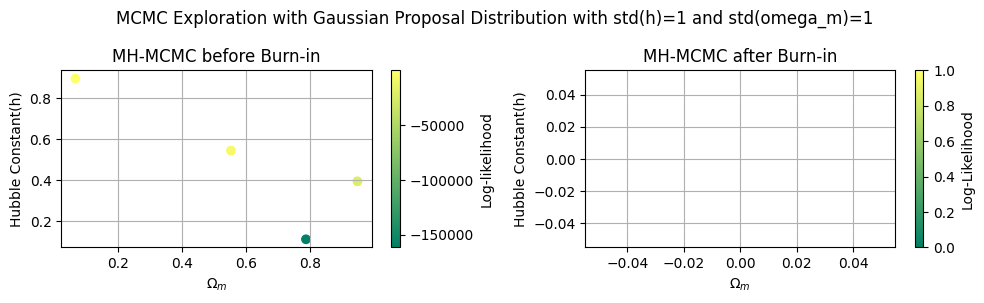

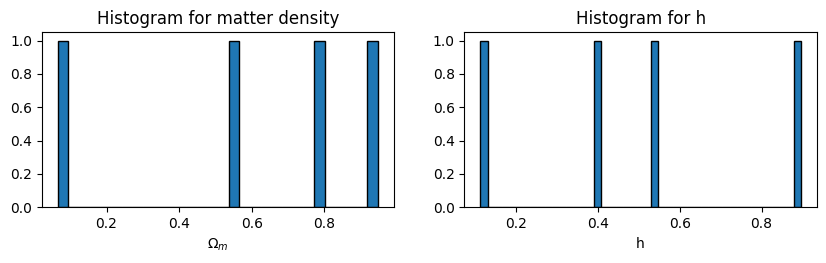

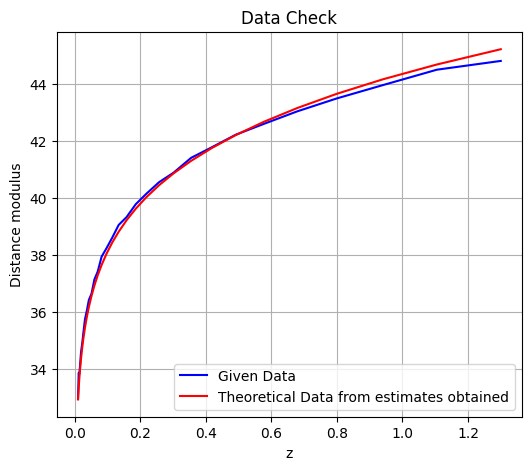

In [14]:
#second

#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as ii
import warnings
warnings.filterwarnings('ignore')

SNdata = np.genfromtxt("jla_mub_0.txt")   #actual_data(containing z and M)
z = SNdata[:,0]
M = SNdata[:,1]

def eta(a,omm):
    s = ((1-omm)/omm)**1/3
    return 2*(np.sqrt(s**3 + 1))*(1/a**4 - 0.1540*(s/a**3) + 0.4304*(s**2/a**2)+0.19097*(s**3/a)+0.066941*s**4)**(-1/8)


def DL(z,omm,h):   #Luminosity Distance(DL)
    return (3000)*(1+z)*(eta(1,omm)-eta(1/(1+z),omm))

def mu(z,omm,h):    #Distance modulus(mu)
    return 25 - 5*np.log(h) + 5*np.log10(DL(z,omm,h))

matrix = np.genfromtxt('jla_mub_covmatrix.txt')
m = 31   #size of the square covariant matrix
Cov = np.reshape(matrix, (m,m))  #reshaping covariance matrix
Cov_inv = ii.inv(Cov)  #calculating inverse of covariance matrix

dif = diff = np.empty(m)  

def likelihood(M,z,omm,h):   
    if omm<=0 or h <=0:
        ll = -1e100               #ll for log-likelihood
    elif omm>=1 or h >=1:
        ll = -1e100
    else:
        dif[:] = M-mu(z,omm,h)
        dt = np.dot(Cov_inv,dif)
        ll = -0.5*np.dot(dif,dt)
    return ll

sigma_o = 1
sigma_h = 1

def mh_mcmc(om0,h0):
    om1 = np.abs(om0 + sigma_o*np.random.randn())
    h1 = np.abs(h0 + sigma_h*np.random.randn())

    old_l = likelihood(M,z,om0,h0)
    new_l = likelihood(M,z,om1,h1)

    alpha_l = new_l - old_l
    if np.log(np.random.normal(0.5,1)) < alpha_l:
        return om1,h1,True
    else:
        return om0,h0,False

om_ini = [0.1]   #initial guess or starting point
h_ini = [0.1]    

nap = 0 #Number of Accepted Proposal
log_likelihood = []  #intended to store log liklihood values abtained during each MCMC sampling process

N=100 #given

for i in range(1,N):
    om_prev = om_ini[-1]     #omega_previous
    h_prev = h_ini[-1]

    om_a, h_a,accepted= mh_mcmc(om_prev,h_prev)      #om_a = omega_accepted
    if accepted:
        om_ini.append(om_a)
        h_ini.append(h_a)
        nap += 1
        log_likelihood.append(likelihood(M,z,om_a,h_a))

accep_ratio = (nap*100)/N

#Burn-in  
def burnin(original_value):
    x1, y1 = 0, 50
    x2, y2 = 60, 15
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    scaled_value = m * original_value + b
    return scaled_value/100

#calculating standard deviation foro burn in
n = np.size(om_ini)
std_burnin = np.std(om_ini[n-int(burnin(accep_ratio)*n):])

#burn-in process
burn=0
while np.std(om_ini[burn:]) >= std_burnin:
    burn +=1

#discarding burn-in from :
omega = om_ini[burn:]
hubble_cons = h_ini[burn:]
log_likelihoods = log_likelihood[burn:]

#After burn-in
om_f = np.mean(omega)    #mean of omega after burn in
h_f = np.mean(hubble_cons)    #mean of h after burn in
om_std = np.std(om_ini)       #standard deviation of omega before burn in

#printing results
print('Estimated Matter Density : ',om_f)
print('Estimated h Value : ',h_f)
print('Acceptance Ratio : ', accep_ratio)

#Theoretical distance modulus
xth = np.empty(m)
for i in range(m):
    xth[i] = mu(z[i], om_f, h_f)

#Plotting
plt.figure(figsize=[10, 5])
plt.suptitle(f'MCMC Exploration with Gaussian Proposal Distribution with std(h)={sigma_h} and std(omega_m)={sigma_o}')

#Scatter plot for MH-MCMC before burn-in
plt.subplot(221)
colormap = 'summer'
plt.scatter(om_ini[1:],h_ini[1:],c=log_likelihood,cmap=colormap)
cbar=plt.colorbar()
cbar.set_label('Log-likelihood')
plt.title('MH-MCMC before Burn-in')
plt.xlabel(f'$\Omega_m$')
plt.ylabel('Hubble Constant(h)')
plt.grid()

#Scatter plot for MH-MCMC after burn-in 
plt.subplot(222)
colormap = 'summer'
plt.scatter(omega[1:],hubble_cons[1:],c=log_likelihoods,cmap=colormap)
cbar=plt.colorbar()
cbar.set_label('Log-Likelihood')
plt.title('MH-MCMC after Burn-in')
plt.xlabel(f'$\Omega_m$')
plt.ylabel('Hubble Constant(h)')
plt.grid()

plt.tight_layout()


#Histrogram
plt.figure(figsize=[10, 5])
plt.subplot(223)
plt.hist(om_ini[1:],bins=30,edgecolor='black')
plt.title('Histogram for matter density')
plt.xlabel(f'$\Omega_m$')

plt.subplot(224)
plt.hist(h_ini[1:],bins=45,edgecolor='black')
plt.title('Histogram for h')
plt.xlabel('h')
plt.show()


plt.xlabel('z')
plt.ylabel('Distance modulus')
plt.title('Data Check')
plt.plot(z, M, c='b', label="Given Data")
plt.plot(z, xth, c='r', label="Theoretical Data from estimates obtained")
plt.legend()
plt.grid()
plt.show()




*Variance and Covariance*

In [361]:
covariance = np.cov(omega[1:], hubble_cons[1:])[0,1]
varience_omega = np.var(omega[1:])
varience_hubble = np.var(hubble_cons[1:])

print('Covariance:', covariance)
print('Variance Omega:', varience_omega)
print('Variance Hubble:', varience_hubble)

Covariance: 0.00010648220117376606
Variance Omega: 3.70753810121064e-06
Variance Hubble: 0.005509405069229128
